Mengambil API ke CSV

In [ ]:
import requests
import pandas as pd

# API
API_KEY = ''
cities = ['London', 'Jambi', 'Tokyo', 'Jakarta', 'Paris', 'Berlin']

# Get weather data
def get_weather(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    return response.json()

weather_data = []
for city in cities:
    data = get_weather(city)
    weather_data.append({
        'City': city,
        'Temperature': data['main']['temp'],
        'Humadity': data['main']['humidity'],
        'Weather': data['weather'][0]['description']
    })

# Save to CSV
df = pd.DataFrame(weather_data)
df.to_csv('weather.csv', index=False)

In [ ]:
df = pd.read_csv('weather.csv')
df

,City,Temperature,Humadity,Weather
0,London,18.05,77,broken clouds
1,Jambi,24.83,94,scattered clouds
2,Tokyo,20.17,78,broken clouds
3,Jakarta,28.49,74,scattered clouds
4,Paris,16.57,88,moderate rain
5,Berlin,25.13,48,clear sky


In [ ]:
# EDA
print(df.head())
df.describe()

      City  Temperature  Humadity           Weather
0   London        18.09        77     broken clouds
1    Jambi        24.83        94  scattered clouds
2    Tokyo        20.17        78     broken clouds
3  Jakarta        28.37        64  scattered clouds
4    Paris        16.57        88     moderate rain


,Temperature,Humadity
count,6.000000,6.000000
mean,22.193333,74.833333
std,4.610430,16.690317
min,16.570000,48.000000
25%,18.610000,67.250000
50%,22.500000,77.500000
75%,25.055000,85.500000
max,28.370000,94.000000


MELAKUKAN VISUALISASI DATA

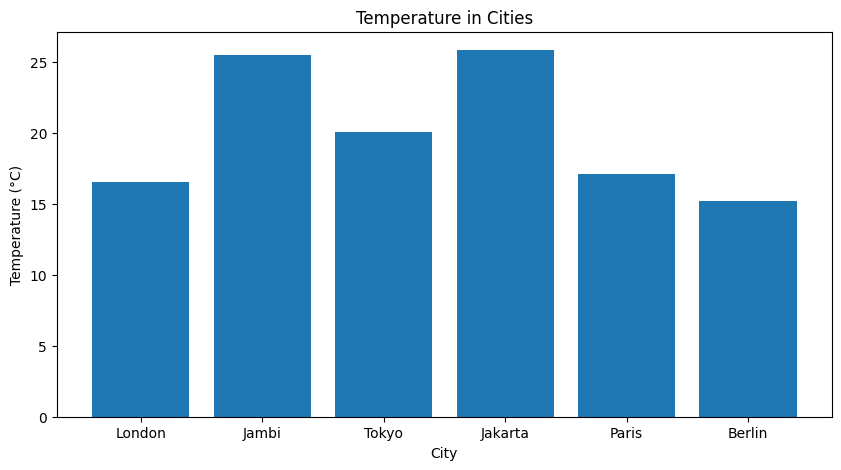

Max Temperature: 25.82°C
Min Temperature: 15.18°C
Avg Temperature: 20.021666666666672°C
City with highest temperature is ['Jakarta'] with 25.82°C
City with lowest temperature is ['Berlin'] with 15.18°C
Most of the weather is broken clouds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV
df = pd.read_csv('weather.csv')

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Temperature'])
plt.title('Temperature in Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()

# Max Temperature
max_temp = df['Temperature'].max()
print(f'Max Temperature: {max_temp}°C')

# Lowest Temperature
min_temp = df['Temperature'].min()
print(f'Min Temperature: {min_temp}°C')

# Avg Temperature
avg_temp = df['Temperature'].mean()
print(f'Avg Temperature: {avg_temp}°C')

# Cities with highest temperature
max_temp_city = df[df['Temperature'] == max_temp]['City'].values
print(f'City with highest temperature is {max_temp_city} with {max_temp}°C')

# Cities with lowest temperature
min_temp_city = df[df['Temperature'] == min_temp]['City'].values
print(f'City with lowest temperature is {min_temp_city} with {min_temp}°C')

# Most weather
most_weather = df['Weather'].value_counts().idxmax()
print(f'Most of the weather is {most_weather}')

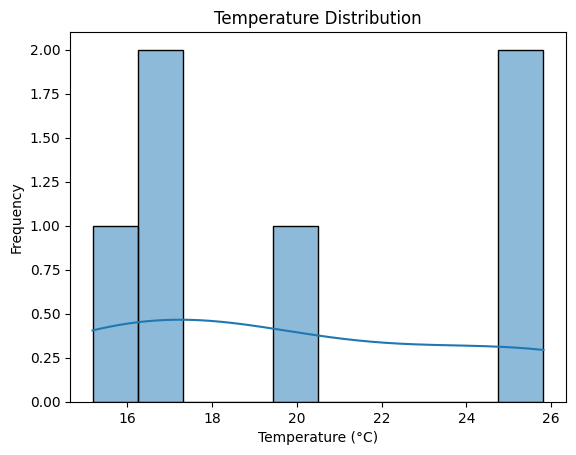

Data city dan temperature:
      City  Temperature
0   London        16.53
1    Jambi        25.45
2    Tokyo        20.03
3  Jakarta        25.82
4    Paris        17.12
5   Berlin        15.18


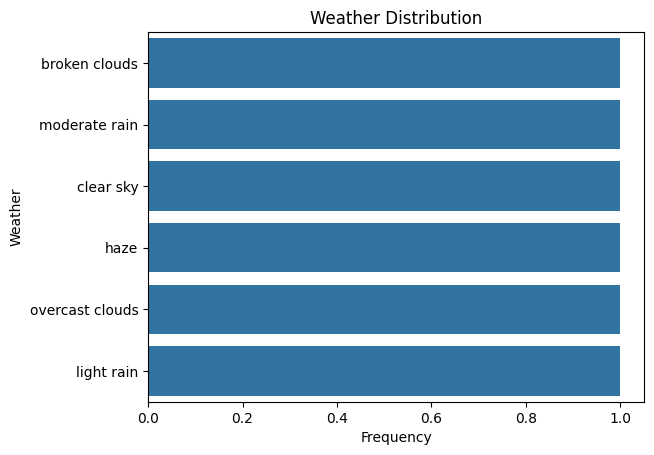

Data city dan weather:
      City          Weather
0   London    broken clouds
1    Jambi    moderate rain
2    Tokyo        clear sky
3  Jakarta             haze
4    Paris  overcast clouds
5   Berlin       light rain


In [ ]:
# Visualize Data
# Visualize Temperature Distribution
sns.histplot(df['Temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

print("Data city dan temperature:")
print(df[['City', 'Temperature']])

# Visualize Weather Distribution
sns.countplot(y='Weather', data=df)
plt.title('Weather Distribution')
plt.xlabel('Frequency')
plt.ylabel('Weather')
plt.show()

print('Data city dan weather:')
print(df[['City','Weather']])